In [6]:
library(ggplot2)
library(dplyr)

In [3]:
m_abx_ctrl = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Metabolomics/M_ABX_v_Ctrl.csv", header = T, sep = ",")
f_abx_ctrl = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Metabolomics/F_ABX_v_Ctrl.csv", header = T, sep = ",")
abx_ctrl = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Metabolomics/ABX_v_Ctrl.csv", header = T, sep = ",")
m_abxfmt_ctrl = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Metabolomics/M_ABXfmt_v_Ctrl.csv", header = T, sep = ",")

m_abx_fmt = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Metabolomics/M_ABX_v_FMT.csv", header = T, sep = ",")
m_abx_f_abx = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Metabolomics/M_ABX_v_F_ABX.csv", header = T, sep = ",")
m_ctl_f_ctl = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Metabolomics/M_CTL_v_F_CTL.csv", header = T, sep = ",")


In [33]:
head(m_abx_fmt)
head(m_abx_f_abx)

Metabolite,log2fc,FC,log_pvalue,pvalue
Unknown_2022,-0.2713779,0.8285279,5.242442,5.72213e-06
Unknown_2708,-0.2920096,0.8167636,5.105247,7.84789e-06
Unknown_3715,-0.3745755,0.7713323,4.956747,1.10472e-05
Unknown_6058,0.4596780,1.3752348,4.854426,1.39821e-05
Unknown_3546,-0.2437501,0.8445472,4.760119,1.73733e-05
Unknown_326,0.3784542,1.2999483,4.513647,3.06445e-05


Metabolite,log2fc,FC,log_pvalue,pvalue
Unknown_2993,-2.867849,0.1369908,12.58696,2.58844e-13
Unknown_6625,2.702265,6.5082304,12.49466,3.20138e-13
Unknown_3014,-2.826806,0.1409440,12.29386,5.08328e-13
Unknown_7329,2.561127,5.9016844,11.90041,1.25774e-12
Unknown_7845,2.055439,4.1567006,11.47283,3.36644e-12
Unknown_6770,4.030742,16.3445986,11.08764,8.17252e-12


png 
  2

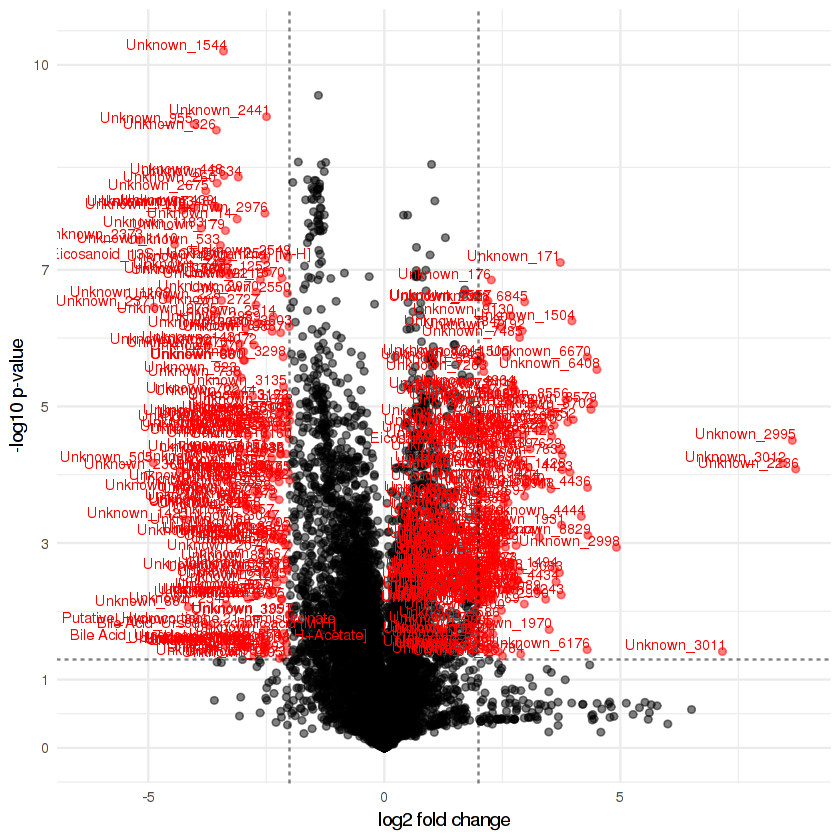

In [35]:
data = m_abx_fmt %>%
  # Add a threhold for significant observations
  mutate(threshold = if_else(log2fc >= 2 & log_pvalue >= 1.3 |
                               log2fc <= -2 & log_pvalue >= 1.3,"A", "B"))

  # Plot with points coloured according to the threshold
p = ggplot(data, aes(log2fc,log_pvalue, colour = threshold)) +
  geom_point(alpha = 0.5) +
  # Label specific points
  geom_text(data=subset(data, log2fc >= 2 & log_pvalue >= 1.3 |
                               log2fc <= -2 & log_pvalue >= 1.3),position=position_nudge(x=-1,y=.1), size=3, aes(label=Metabolite)) +
  # Add dotted lines to indicate the threshold, semi-transparent
  geom_hline(yintercept = 1.3, linetype = 2, alpha = 0.5) + 
  geom_vline(xintercept = 2, linetype = 2, alpha = 0.5) +
  geom_vline(xintercept = -2, linetype = 2, alpha = 0.5) +
  # Set the colour of the points
  scale_colour_manual(values = c("A" = "red", "B" = "black")) +
  xlab("log2 fold change") + ylab("-log10 p-value") +
  theme_minimal() + 
  theme(legend.position="none")
p = p + scale_y_continuous(breaks=c(0,1,3,5,7,10))
p

write.csv(data, "/gpfs/data/gilbert-lab/Lutz/Alzheimers/Metabolomics/m_abx_fmt_sigvals.csv" )
png('m_abx_fmt.png', width=6, height=8, units='in', res=300)
plot(p)
dev.off()

In [2]:
M_abx_rna = read.csv("/projects/gilbert_lab/Lutz/Alzheimers/RNAseq/M_Abx_conditionals.csv")

In [3]:
head(M_abx_rna)

,featureid,X90034abf8f36ff4866ec378466e6a743,X7670f7777bd47d3fcb4e3c8b7308b72d,X6a473913ffd918e16a5b7a847924af3b,a3cc519fb999298bc53c677aca04a74b,dad062a8450d74c4c90587e365e586c3,X3804619efffdece0697282081b66574d,c5e9cf7404a0e823ce2eb6d48fdf6939,c74001b071ca6b3bec479406571cf665,d50efd33183ebbdbd3c89424f0875d81,⋯,cd1ea085f14481e72fefcea96c675804,X8c8b4b69de17f3c50429506e42bb8ea4,X536e9c38efc573d932c547adf21ad7d1,X6d56342985128f8032ce4f47d7c663a0,X68b6c4183ca0d20ff90bf8f586c9552f,f496def691c0c971aa3a163bcc359a5d,X9125bd4167fccc748f6501ac10d81f77,d0557f8d8adcac6aac01ef6faadddfd0,X6cb9252d6d7249c44c1641b85c44148b,X35efc74ecf504ee8e858115549ec7d91
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000109644,-0.1586293,-0.66740967,-0.4673121,0.9967289,0.4700931,-0.16515143,-0.2033710,1.4120916,-0.3255740,⋯,-1.032122458,0.1822225,-0.4895973,-1.21786082,-1.1145886,-0.1411293,-0.7507362,-1.7749936,0.17425306,-0.1655206
2,ENSMUSG00000021252,3.0826244,0.61237684,1.5837026,0.9228807,2.6096594,0.34858669,1.0337288,-1.1098778,-0.5797177,⋯,0.472955240,1.5317005,2.0821703,0.34730275,-0.1755914,-1.3008866,-1.1510463,-0.5802796,0.43018779,0.7192354
3,ENSMUSG00000007777,-3.0594595,-0.09745936,-1.2160298,-0.3271070,-1.3130051,0.04159002,0.2517218,1.3712745,1.1887088,⋯,0.007467785,-1.0175030,-1.4820134,0.00832399,0.4339448,1.8791109,1.6373915,1.3854694,0.11766684,-0.4512005
4,ENSMUSG00000043644,-3.8744265,-0.89012638,-2.9223761,-2.1387177,-0.9701996,-1.82280029,-0.4286590,-1.7050807,-0.8058578,⋯,-1.979218676,-2.2775984,-1.7803908,-1.95608256,-2.6428754,-0.1007561,-0.8741049,-0.6419099,-2.77163589,-2.1828385
5,ENSMUSG00000024442,-3.7251697,0.56053286,-2.0727725,-1.0145780,-1.3093400,-0.17971954,0.2198526,0.9164034,1.2940661,⋯,-0.488383564,-1.4659055,-1.3315475,-0.29467508,-0.6386734,2.4994723,1.6561386,1.3215013,-1.35638068,-0.6931028
6,ENSMUSG00000078886,4.0533719,3.44186611,2.1780883,1.6827729,3.8570037,1.96510952,2.3516983,0.3437824,1.4615136,⋯,1.619123750,2.6498905,3.9984309,1.86304526,0.2931002,1.5770005,0.8763710,1.0935530,0.08647329,2.3499075


In [9]:
library(reshape2)
x = melt(M_abx_rna)

Using featureid as id variables



In [10]:
head(x)

,featureid,variable,value
,<fct>,<fct>,<dbl>
1,ENSMUSG00000109644,X90034abf8f36ff4866ec378466e6a743,-0.1586293
2,ENSMUSG00000021252,X90034abf8f36ff4866ec378466e6a743,3.0826244
3,ENSMUSG00000007777,X90034abf8f36ff4866ec378466e6a743,-3.0594595
4,ENSMUSG00000043644,X90034abf8f36ff4866ec378466e6a743,-3.8744265
5,ENSMUSG00000024442,X90034abf8f36ff4866ec378466e6a743,-3.7251697
6,ENSMUSG00000078886,X90034abf8f36ff4866ec378466e6a743,4.0533719


In [14]:
p = ggplot(x, aes(x = featureid,y = variable) + geom_point(alpha = 0.5)) 

p


ERROR: Error: Mapping should be created with `aes() or `aes_()`.
